# A First Look into the Himawari-8 Images

The first step of analysis is to explore the basic statistics of the Himawari-8 images.

The dimension of our dataset:
- 3300 x 3300 pixels
- 15' ~ 30'N / 114' ~ 129' E (~500m in real space)

And the data came in every 10 minutes if there is no missing.

First we use the 142 images in 2017-06-01 for a test.

In [13]:
import numpy as np
import pandas as pd

# Binary reader
def read_himawari8_btp(furi):
    ''' The method reads in a Himawari 8 image in binary format (.btp file). 
        the binary file contains 10,890,000 float point numbers (4-byte) represent 
        the brightness temperature. '''
    # Read in data
    data = np.fromfile(furi, np.float32)
    return(data.reshape((3300,3300)))

# Statistical summary
def summarize_single_image(img):
    ''' Calculate basic statistics of one Himawari-8 image. '''
    mean = np.mean(img.flatten())
    std = np.std(img.flatten())
    pt = np.percentile(img.flatten(), [0, 25, 50, 75,100])
    return({'mean':mean, 'stdev':std, 'min':pt[0],'pt25':pt[1],'median':pt[2],'pt75':pt[3], 'max':pt[4]})

# Test
tmp = read_himawari8_btp('../../data/himawari8_btp/2017-06-01_0000.B13.PCCU.btp')
print(tmp.shape)
print(summarize_single_image(tmp))

(3300, 3300)
{'mean': 269.26297, 'stdev': 24.10402, 'min': 202.0759735107422, 'pt25': 251.4745330810547, 'median': 277.27655029296875, 'pt75': 290.83428955078125, 'max': 298.4156188964844}


In [9]:
import os

xfiles = []
for root, dirs, files in os.walk('../../data/himawari8_btp/'): 
    for fn in files:
        if fn.endswith('.btp'): 
             xfiles.append({'timestamp':fn.replace('.B13.PCCU.btp',''), 'xuri':os.path.join(root, fn)})

xfiles = pd.DataFrame(xfiles)
print(xfiles.head())

         timestamp                                               xuri
0  2017-06-01_0000  ../../data/himawari8_btp/2017-06-01_0000.B13.P...
1  2017-06-01_0010  ../../data/himawari8_btp/2017-06-01_0010.B13.P...
2  2017-06-01_0020  ../../data/himawari8_btp/2017-06-01_0020.B13.P...
3  2017-06-01_0030  ../../data/himawari8_btp/2017-06-01_0030.B13.P...
4  2017-06-01_0040  ../../data/himawari8_btp/2017-06-01_0040.B13.P...


In [14]:
list_stats = []
for i in range(xfiles.shape[0]):
    row = xfiles.iloc[i,:]
    tmp = read_himawari8_btp(row['xuri'])
    stats = summarize_single_image(tmp)
    stats['timestamp'] = row['timestamp']
    list_stats.append(stats)

dfstats = pd.DataFrame(list_stats)
print(dfstats.head())

         mean      stdev         min        pt25      median        pt75  \
0  269.262970  24.104019  202.075974  251.474533  277.276550  290.834290   
1  269.255615  24.242523  203.020599  250.875427  277.430847  290.941559   
2  269.210663  24.390991  203.944473  250.184433  277.523315  291.075500   
3  269.142334  24.541594  203.638748  249.705399  277.615662  291.182526   
4  269.052887  24.682529  205.244553  249.046814  277.830811  291.289429   

          max        timestamp  
0  298.415619  2017-06-01_0000  
1  298.465576  2017-06-01_0010  
2  298.315643  2017-06-01_0020  
3  298.190552  2017-06-01_0030  
4  297.990112  2017-06-01_0040  


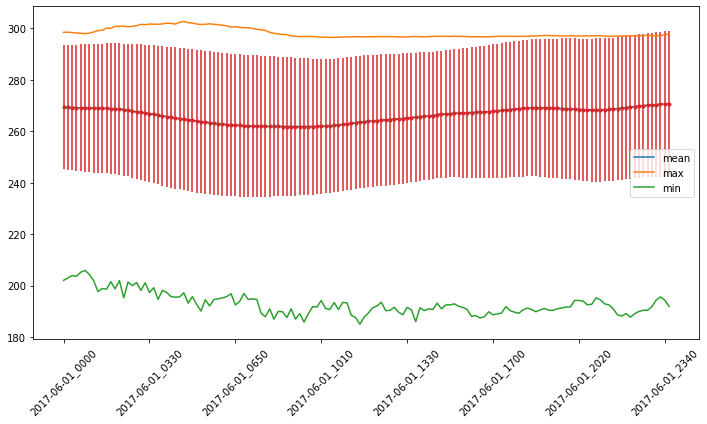

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(dfstats['mean'], label='mean')
plt.plot(dfstats['max'], label='max')
plt.plot(dfstats['min'], label='min')
plt.errorbar(np.arange(dfstats.shape[0]),dfstats['mean'],dfstats['stdev'],linestyle='--', marker='.')
plt.xticks(np.arange(0, dfstats.shape[0], 20), dfstats['timestamp'][np.arange(0, dfstats.shape[0], 20)], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()